In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

In [2]:
#Reading the CSV into a DataFrame and showing a few columns to understand the data
Titanic_ship_data= "titanic_data.csv"
Titanic_df= pd.read_csv(Titanic_ship_data)
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# An explanation of the Column names

# Survived: Survival - 0 = No, 1 = Yes

# Pclass: Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
# Sex: Sex
# Age: Age in years
# Sibsp: Number of siblings / spouses aboard the Titanic
# Parch: Number of parents / children aboard the Titanic
# Ticket: Ticket number
# Fare: Passenger fare
# Cabin: Cabin number
# Embarked- Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
# Variable Notes
# Pclass: A proxy for socio-economic status (SES)/Ticket class
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# Sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# Parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.



In [4]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From this, I can see that there are Null values in the Age and Cabin columns, I would keep this in mind during my analysis 

In [5]:
# Checking for duplicated columns
len(Titanic_df[Titanic_df.duplicated()])

0

Seeing there are no duplicated columns, I would move on with my analysis

# Question

### What factors made people more likely to survive?

For this, we would be analysing all columns, seeing how many can be considered as a factor of survival.


However, we would not be considering the Cabin column because of it's major inconsistency in the data

## Analysis of the Pclass column

In [6]:
Titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
Per_Ticket= Titanic_df.groupby("Pclass")["Survived"].sum()
Per_Ticket

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [8]:
Ticket= Titanic_df.Pclass.value_counts(sort= False)
Ticket

1    216
2    184
3    491
Name: Pclass, dtype: int64

There was 62.96 percent rate of survival for people with ticket class 1
There was 47.28 percent rate of survival for people with ticket class 2
There was 24.24 percent rate of survival for people with ticket class 3


Text(0.5, 1.0, 'Survival rate based on Ticket class')

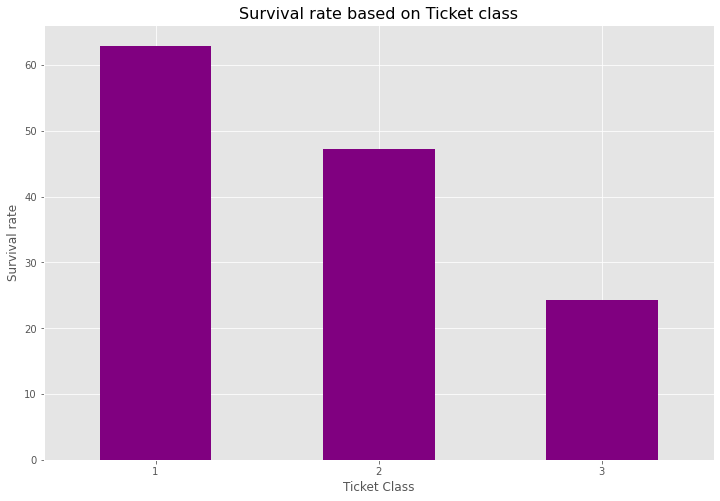

In [9]:
Rate= (Per_Ticket/Ticket)*100
for i,j in Rate.iteritems():
    print("There was {} percent rate of survival for people with ticket class {}". format(round(j,2),i))
Rate.plot(kind= "bar",color="purple", rot=0, figsize=(12,8))
plt.xlabel("Ticket Class")
plt.ylabel("Survival rate")
plt.title("Survival rate based on Ticket class", fontsize=16)

### From the above results, we can see that those with 1st class tickets had the highest survival rate, and as the socio-economic status of the tickets decreased, the rates decreased



## Analysis of the Sex column

In [10]:
Titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
No_Survived= Titanic_df.groupby("Sex")["Survived"].sum()
No_of_People= Titanic_df.Sex.value_counts()

In [12]:
Rate_sex= (No_Survived/No_of_People)*100
for i,j in Rate.iteritems():
    print("There was {} percent rate of survival for {}s". format(round(j,2),i))

There was 62.96 percent rate of survival for 1s
There was 47.28 percent rate of survival for 2s
There was 24.24 percent rate of survival for 3s


Text(0.5, 1.0, 'Survival Rate based on Sex')

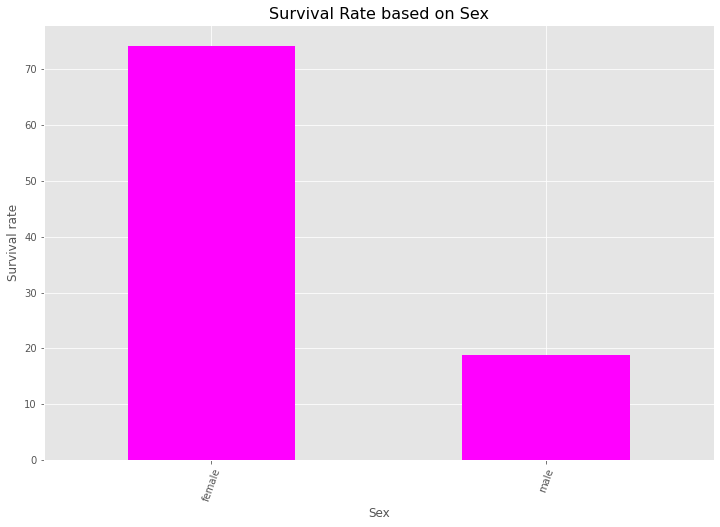

In [13]:
Rate_sex.plot(kind="bar", color="magenta", figsize=(12,8), rot=70)
plt.xlabel("Sex")
plt.ylabel("Survival rate")
plt.title("Survival Rate based on Sex", fontsize=16)

### From the above analysis, we can see that females had an astronimically higher survival rate than their male counterparts

## Analysis of the Ages column

In [14]:
# we are dropping NaN values in the age so it doesnt affect our analysis
Age_df=Titanic_df.dropna(axis=0, subset=["Age"]).copy()
Age_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
Age_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

We can see that all the null values in the Age column has been dropped, we would now continue with our Analysis

In [16]:
#setting a function to classify the ages
def group(row):
    if row <= 1:
        cls= "Infant"
    elif row <= 11:
        cls= "Child"
    elif row<= 17:
        cls= "Teen"
    elif row<= 64:
        cls= "Adult"
    else:
        cls= "Elderly"
    return(cls)

In [17]:
Age_df["Age_group"]= Age_df["Age"].apply(group)
Age_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [18]:
Age_surv= Age_df.groupby(["Age_group"])["Survived"].sum()
Age_surv= pd.concat([Age_surv,(Age_df.Age_group.value_counts())], axis=1)

In [19]:
Age_surv["Surv_rate"]= (Age_surv.Survived/Age_surv.Age_group)*100
for i,j in Age_surv.Surv_rate.iteritems():
    print("There was a {} percent rate for a/an {} to survive".format(round(j,2),i))

There was a 38.64 percent rate for a/an Adult to survive
There was a 50.0 percent rate for a/an Child to survive
There was a 9.09 percent rate for a/an Elderly to survive
There was a 85.71 percent rate for a/an Infant to survive
There was a 48.89 percent rate for a/an Teen to survive


In [20]:
Age_surv.rename(columns={"Age_group":"No_People"}, inplace=True)

Text(0.5, 1.0, 'Survival Rates in Different Age Groups')

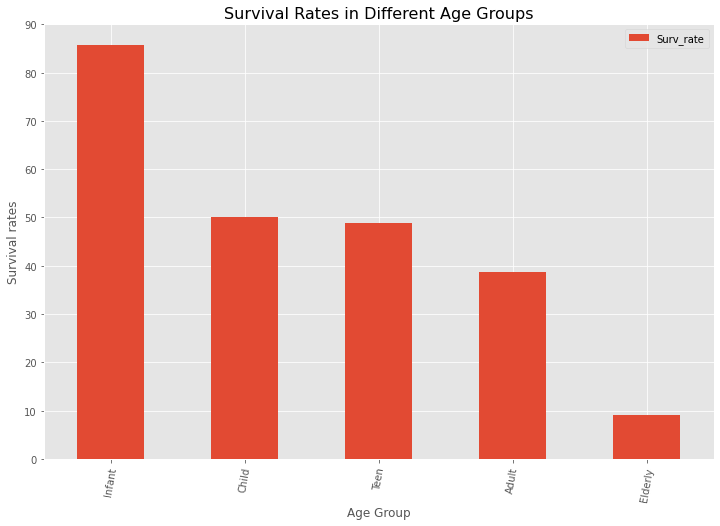

In [21]:
Age_surv.reset_index().sort_values("Surv_rate", ascending=False).plot(x= "index", y="Surv_rate", kind="bar", rot=80, figsize=(12,8))
plt.xlabel("Age Group")
plt.ylabel("Survival rates")
plt.title("Survival Rates in Different Age Groups", fontsize=16)

#### From the above explorations, we can see that the younger age groups had the highest rates of survival and these decreased as the ages increased

## Analysis of the Siblings/Spouse column

We would be analysing this column based on the number of siblings/spouses each person had on board and seeing if it played a role in their survival

In [22]:
Titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
SibSp_df= Titanic_df.groupby("SibSp")["Survived"].sum()

In [24]:
No_P= Titanic_df.SibSp.value_counts()

In [25]:
Rate_Sb= (SibSp_df/No_P)*100
for i,j in Rate_Sb.iteritems():
    print("There was {}% rate of Survival for individuals with {} amount(s) of siblings/spouses". format(round(j,2),i))

There was 34.54% rate of Survival for individuals with 0 amount(s) of siblings/spouses
There was 53.59% rate of Survival for individuals with 1 amount(s) of siblings/spouses
There was 46.43% rate of Survival for individuals with 2 amount(s) of siblings/spouses
There was 25.0% rate of Survival for individuals with 3 amount(s) of siblings/spouses
There was 16.67% rate of Survival for individuals with 4 amount(s) of siblings/spouses
There was 0.0% rate of Survival for individuals with 5 amount(s) of siblings/spouses
There was 0.0% rate of Survival for individuals with 8 amount(s) of siblings/spouses


Text(0.5, 1.0, 'Survival rate based on the number of Siblings/Spouses on board')

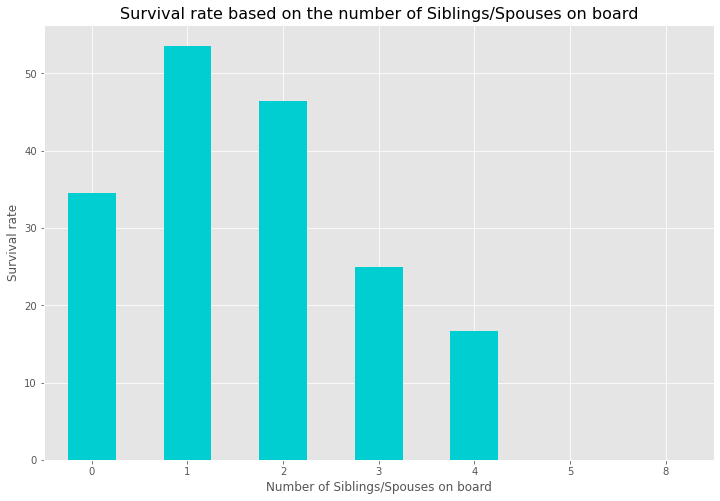

In [26]:
Rate_Sb.plot(kind="bar", color="darkturquoise", rot=0, figsize=(12,8))
plt.xlabel("Number of Siblings/Spouses on board")
plt.ylabel("Survival rate")
plt.title("Survival rate based on the number of Siblings/Spouses on board", fontsize=16)

### From this analysis, we can see that the highest survival rate occured around individuals with just 1 sibling/spouse while the individuals with the largest numbers of siblings/spouse had no survivors

### Analysis of the Parents/Children column 

We would be analysing this column based on the number of Parents/Children each person had on board and seeing if it played a role in their survival

In [27]:
Titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [28]:
Parch_df=Titanic_df.groupby("Parch")["Survived"].sum()
Parch_df

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [29]:
Rate_Pc= (Parch_df/Titanic_df.Parch.value_counts())*100
for i,j in Rate_Pc.iteritems():
    print("There was {}% rate of Survival for individuals with {} amount(s) of parents/children".format(round(j,2),i))

There was 34.37% rate of Survival for individuals with 0 amount(s) of parents/children
There was 55.08% rate of Survival for individuals with 1 amount(s) of parents/children
There was 50.0% rate of Survival for individuals with 2 amount(s) of parents/children
There was 60.0% rate of Survival for individuals with 3 amount(s) of parents/children
There was 0.0% rate of Survival for individuals with 4 amount(s) of parents/children
There was 20.0% rate of Survival for individuals with 5 amount(s) of parents/children
There was 0.0% rate of Survival for individuals with 6 amount(s) of parents/children


Text(0.5, 1.0, 'Survival rates based on the number of Parents/Children on board')

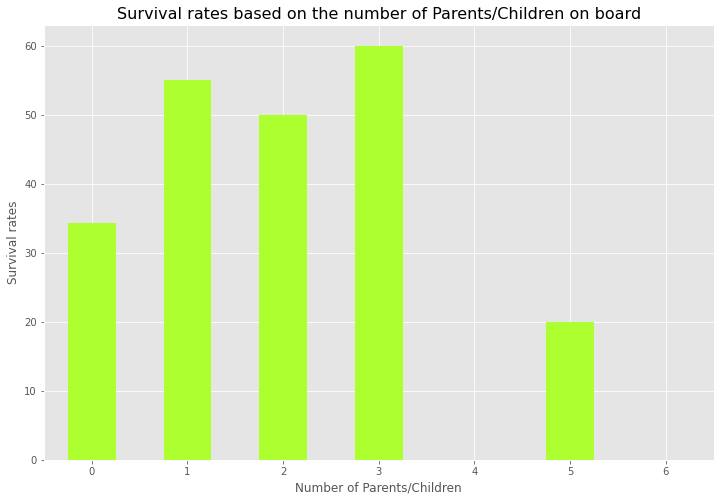

In [30]:
Rate_Pc.plot(kind="bar", color="greenyellow", rot=0, figsize=(12,8))
plt.xlabel("Number of Parents/Children")
plt.ylabel("Survival rates")
plt.title("Survival rates based on the number of Parents/Children on board", fontsize=16)

### From the above, we can see that the hghest survival rates occured between individuals with 1-3 parents/children

## Analysis of the Tickets column

In [31]:
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
Titanic_df.Ticket.value_counts()

1601                  7
347082                7
CA. 2343              7
CA 2144               6
3101295               6
                     ..
PC 17603              1
228414                1
SOTON/O.Q. 3101310    1
349248                1
342826                1
Name: Ticket, Length: 681, dtype: int64

From this, I can see that the variation is inconsistent and too wide, meaning it would have little

or no effect on the rate of survival and so, I would not be visualizing this data

## Analysis of the Passenger Fares column

In [33]:
Titanic_df[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [34]:
Titanic_df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

Like the Ticket column, the variation is too wide and observing the dataframe displayed above, you would see the inconsistency in the fares. Following up on these, I would not be visualizing this data.

## Analysis of the Point of Embarkation column

In [35]:
Titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
Embarked_df= Titanic_df.dropna(axis=0, subset=["Embarked"]).copy()
Points= Embarked_df["Embarked"].value_counts()

In [37]:
Survivals= Titanic_df.groupby("Embarked")["Survived"].sum()

In [38]:
Surv_rate= (Survivals/Points)*100
for i,j in Surv_rate.iteritems():
    if i=="C":
        i="Cherbourg"
    elif i=="Q":
        i="Queenstown"
    else:
        i="Southampton"
    print("The rate of Survival for individuals that embarked at {} was {} percent". format(i,round(j,2)))

The rate of Survival for individuals that embarked at Cherbourg was 55.36 percent
The rate of Survival for individuals that embarked at Queenstown was 38.96 percent
The rate of Survival for individuals that embarked at Southampton was 33.7 percent


In [39]:
Surv_rate= pd.concat([Survivals, Points, Surv_rate], axis=1).reset_index()
Surv_rate.rename(columns={0:"SurvRate", "index":"ini"}, inplace=True)
Surv_rate

,ini,Survived,Embarked,SurvRate
0,C,93,168,55.357143
1,Q,30,77,38.961039
2,S,217,644,33.695652


In [40]:
def name(ini):
    if ini== "C":
        ini= "Cherbourg"
    elif ini== "Q":
        ini= "Queenstown"
    else:
        ini= "Southampton"
    return(ini)

In [41]:
Surv_rate["Embarked"]=Surv_rate["ini"].apply(name)
Surv_rate

,ini,Survived,Embarked,SurvRate
0,C,93,Cherbourg,55.357143
1,Q,30,Queenstown,38.961039
2,S,217,Southampton,33.695652


Text(0.5, 1.0, 'Survival rates based on Points of Embarkation')

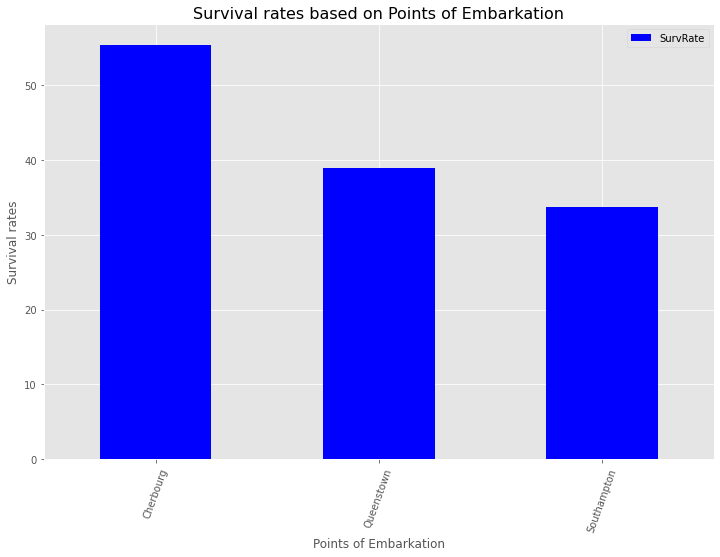

In [42]:
Surv_rate.plot(x="Embarked", y="SurvRate", kind="bar", color="blue", rot=70, figsize=(12,8))
plt.xlabel("Points of Embarkation")
plt.ylabel("Survival rates")
plt.title("Survival rates based on Points of Embarkation", fontsize=16)

### From the above, we can see that those who had embarked at Cherburg had the highest survival rates, while those that embarked at Southampton had the least survival rates

# Conclusion

### From these analysis, it can be concluded that these below were all factors that made people more likely to survive:

#### 1.Ticket class
#### 2. Sex
#### 3. Siblings/Spouse
#### 4. Parents/children
#### 5. Point of embarkation